## 앙상블 Ensemble 결정 트리 기반 알고리즘을 결합하여 구현

## 앙상블의 종류

* Voting : 서로 다른 알고리즘이 가진 분류기를 결합. 사이킷런은 Voting Classifier 클래스를 제공함<br>
    * 하드보팅(Hard Voting) : 분류기들이 예측한 결과 값을 다수결로 결정<br>
    * 소프트 보팅(Soft Voting) : 각 분류기들이 예측값을 확률로 구하면 이를 평균 내에 확률이 가장 높은 값을 결과 값으로 결정
* Bagging : 같은 유형의 알고리즘을 결합, 데이터 샘플링 시 서로 다르게 가져가면서 학습, RandomForest가 대표적임. Bootstrapping Aggregation의 줄임말
* Boosting : 여러개의 분류기가 순차적으로 학습하면서 가중치를 부스팅한다.
* Stacking 기법 : 위의 여러개의 개별적 모델을 학습하여 예측한 데이터 세트를 사용하여 최종 메타 모델이 학습 예측

## Bagging
### 랜덤포레스트
* 의사 결정 트리 기반 분류 알고리즘
* 앙상블, 같은 결정트리를 여러개 사용, 비교적 빠른 수행
* 현재의 랜덤 포레스트의 개념은 레오 브레이먼의 논문에서 만들어짐.
    * 이 논문은 랜덤 노드 최적화와 배깅을 결합한 방법과 같은 CART를 사용해 상관관계가 없는 트리플로 포레스트를 구성하는 방법을 제시했다.

In [17]:
# RandomForestClassifier()

In [23]:
# RandomForestClassifier 예제
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

np.random.seed(10)
# mushroom 데이터 셋 읽어오기
mr = pd.read_csv('mushroom.csv', header = None) # header = None 컬럼명을 읽지 않음
mr.shape # (8124, 23)
print(mr.iloc[:, 0].value_counts()) # 레이블의 분포

# 데이터 내부의 기호를 숫자로 변환하기
label = [] # Y
data = [] # X

for row_index, row in mr.iterrows():
    # 첫번째 행을 추출하여 label에 넣기 (첫행은 행이름이니까 뺴야함)
    label.append(row.iloc[0])
    row_data = []
    
    # 두번째 행부터 추출하여 한 행씩 row_data list에 저장한다.
    for v in row.iloc[1:] :
        row_data.append(ord(v)) # ord() 숫자로 변환
    data.append(row_data) # 한 행씩 list로 저장된 list를 data에 추가한다.

# 학습과 검증 데이터로 나누기.
X_train, X_test, Y_train, Y_test = train_test_split(data, label) # 75% 25% 기본값
len(X_train) # 6093
len(X_test) # 2031
len(Y_train) # 6093
len(Y_test) # 2031

# 학습
# 레이블 클래스의 수가 2개이므로 Binary Classification
# 결정 트리의 개수 100
clf = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)
clf.fit(X_train, Y_train)
# 데이터 예측하기
preds = clf.predict(X_test)

# 정확도 측정
ac_score = metrics.accuracy_score(Y_test, preds)
print('정확도 :', ac_score) # 1.0 = 100%


e    4208
p    3916
Name: 0, dtype: int64
정확도 : 1.0


In [26]:
# fit()으로 학습 수행시 생성된 tree를 스크립트 텍스트 파일로 저장
from sklearn.tree import export_graphviz

estimator = clf.estimators_[0]

export_graphviz(estimator, out_file='mushroom.dot', class_names=['e', 'p'],
               feature_names=list(mr.columns[1:]),
               impurity=True, filled=True, rounded=True)

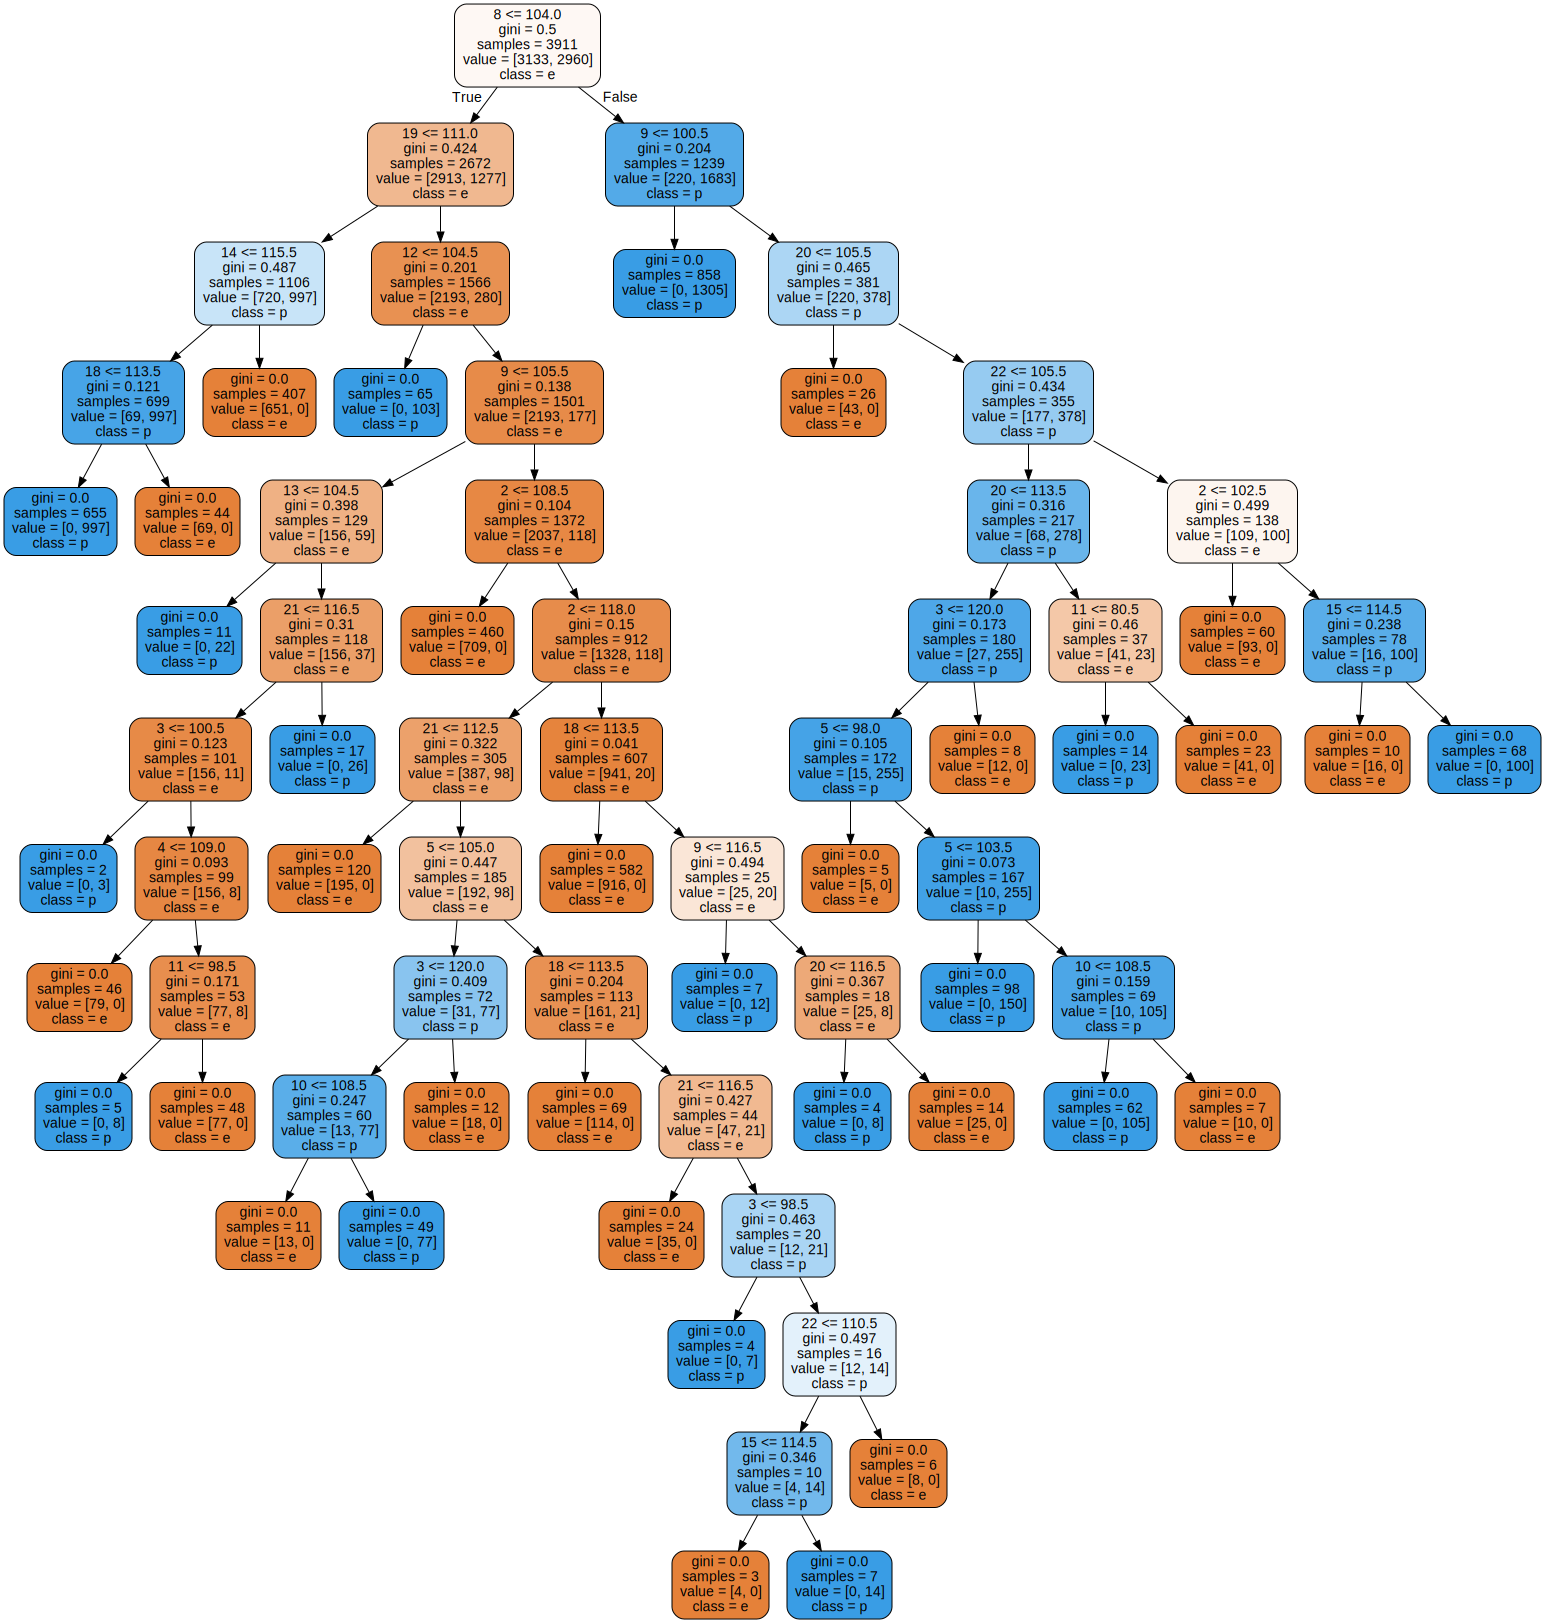

In [27]:
import graphviz
f = open('mushroom.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)